In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Load the data
df = pd.read_csv("amazon_orders.csv")

# Display the first few rows
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Year          247 non-null    int64 
 1   Order Number  247 non-null    object
 2   Date          247 non-null    object
 3   Total Price   238 non-null    object
 4   Product       247 non-null    object
dtypes: int64(1), object(4)
memory usage: 9.8+ KB


In [14]:
# Check for missing values
print(df.isnull().sum())

# Drop empty rows if necessary
df.dropna(inplace=True)

Year            0
Order Number    0
Date            0
Total Price     9
Product         0
dtype: int64


In [15]:
# Remove currency symbols and commas from 'Total Price', convert to float
df['Total Price'] = df['Total Price'].replace({'₹': '', ',': ''}, regex=True)
df['Total Price'] = pd.to_numeric(df['Total Price'], errors='coerce')

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')

# Extract additional features
df['Month'] = df['Date'].dt.month_name()
df['Day of Week'] = df['Date'].dt.day_name()

# Check cleaned data
df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 0 to 246
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Year          238 non-null    int64         
 1   Order Number  238 non-null    object        
 2   Date          238 non-null    datetime64[ns]
 3   Total Price   238 non-null    float64       
 4   Product       238 non-null    object        
 5   Month         238 non-null    object        
 6   Day of Week   238 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 14.9+ KB


(None,
    Year         Order Number       Date  Total Price  \
 0  2024  408-2652756-4522741 2024-12-19       4545.0   
 1  2024  408-4122061-0998700 2024-12-02       8999.0   
 2  2024  408-0433893-3521114 2024-12-02          0.0   
 3  2024  408-6100760-7361151 2024-11-28        147.0   
 4  2024  408-5313454-9553129 2024-11-28        645.0   
 
                                              Product     Month Day of Week  
 0  Philips Cordless Epilator– All-Rounder for Fac...  December    Thursday  
 1  Aquaguard Sure Delight NXT 6-Stage Water Purif...  December      Monday  
 2      Kitchen Installation Service by Eureka Forbes  December      Monday  
 3  Ferrai Girl's Stretchable Belt Pack of 1 Black...  November    Thursday  
 4                     Harpic Limescale Remover 750ml  November    Thursday  )

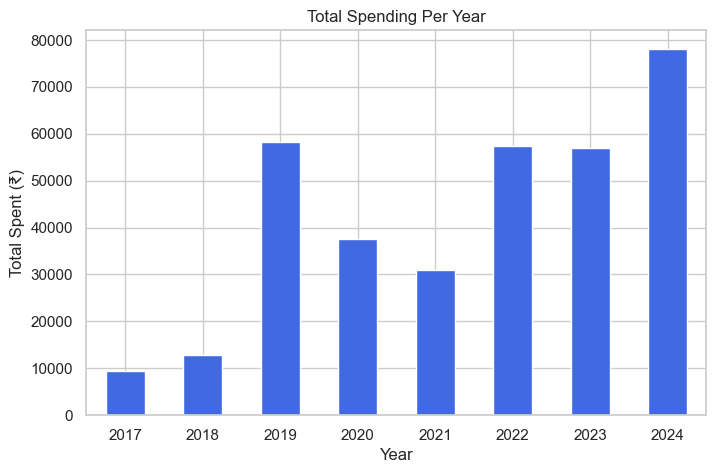

In [16]:
# Group by Year and sum Total Price
yearly_spending = df.groupby("Year")["Total Price"].sum()

# Plot
plt.figure(figsize=(8,5))
yearly_spending.plot(kind="bar", color="royalblue")
plt.xlabel("Year")
plt.ylabel("Total Spent (₹)")
plt.title("Total Spending Per Year")
plt.xticks(rotation=0)
plt.show()


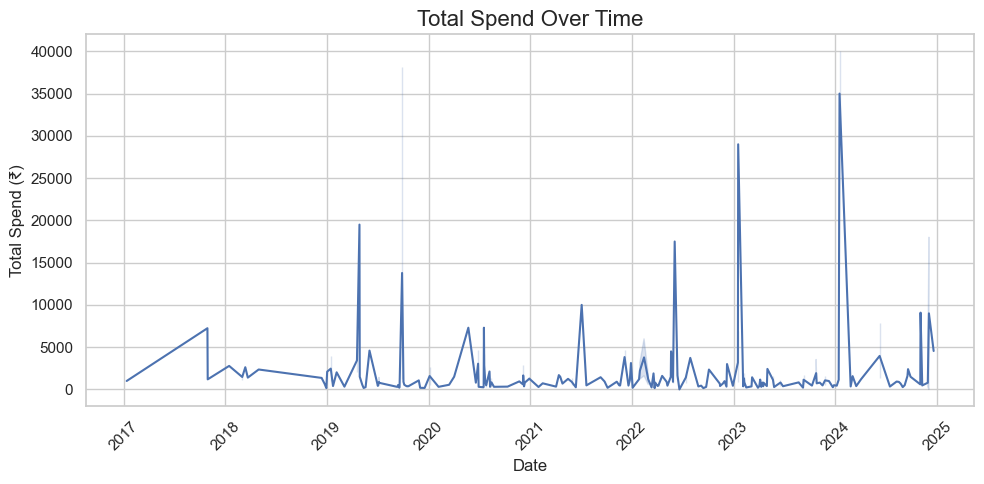

In [19]:
sns.set(style="whitegrid")

# Total Spend Over Time
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Total Price', estimator='sum')
plt.title('Total Spend Over Time', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Total Spend (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

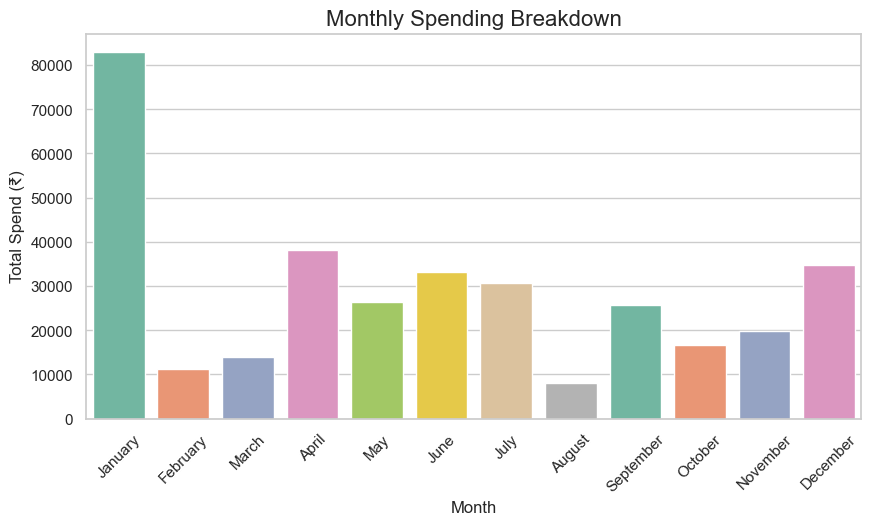

In [ ]:
#Monthly spending breakdown
monthly_spend = df.groupby('Month')['Total Price'].sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])

#plotting
plt.figure(figsize=(10,5))
sns.barplot(x = monthly_spend.index, y=monthly_spend.values, hue=monthly_spend.index, palette='Set2')
plt.title('Monthly Spending Breakdown', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Spend (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

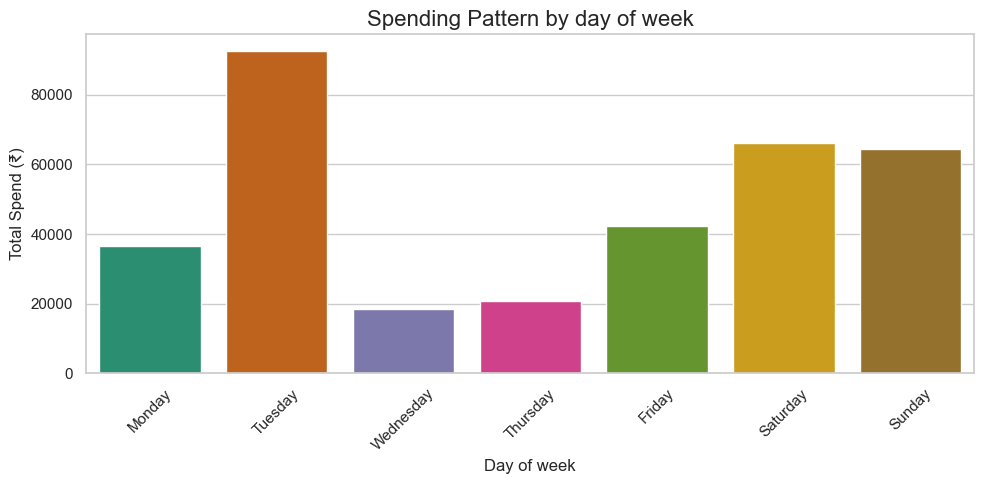

In [28]:
#Daily spending breakdown
daily_spend = df.groupby('Day of Week')['Total Price'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

#plotting
plt.figure(figsize=(10,5))
sns.barplot(x=daily_spend.index, y=daily_spend.values, hue=daily_spend.index, palette='Dark2')
plt.title('Spending Pattern by day of week', fontsize= 16)
plt.xlabel('Day of week')
plt.ylabel('Total Spend (₹)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\KAREN\AppData\Local\Temp\ipykernel_25668\3308390200.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


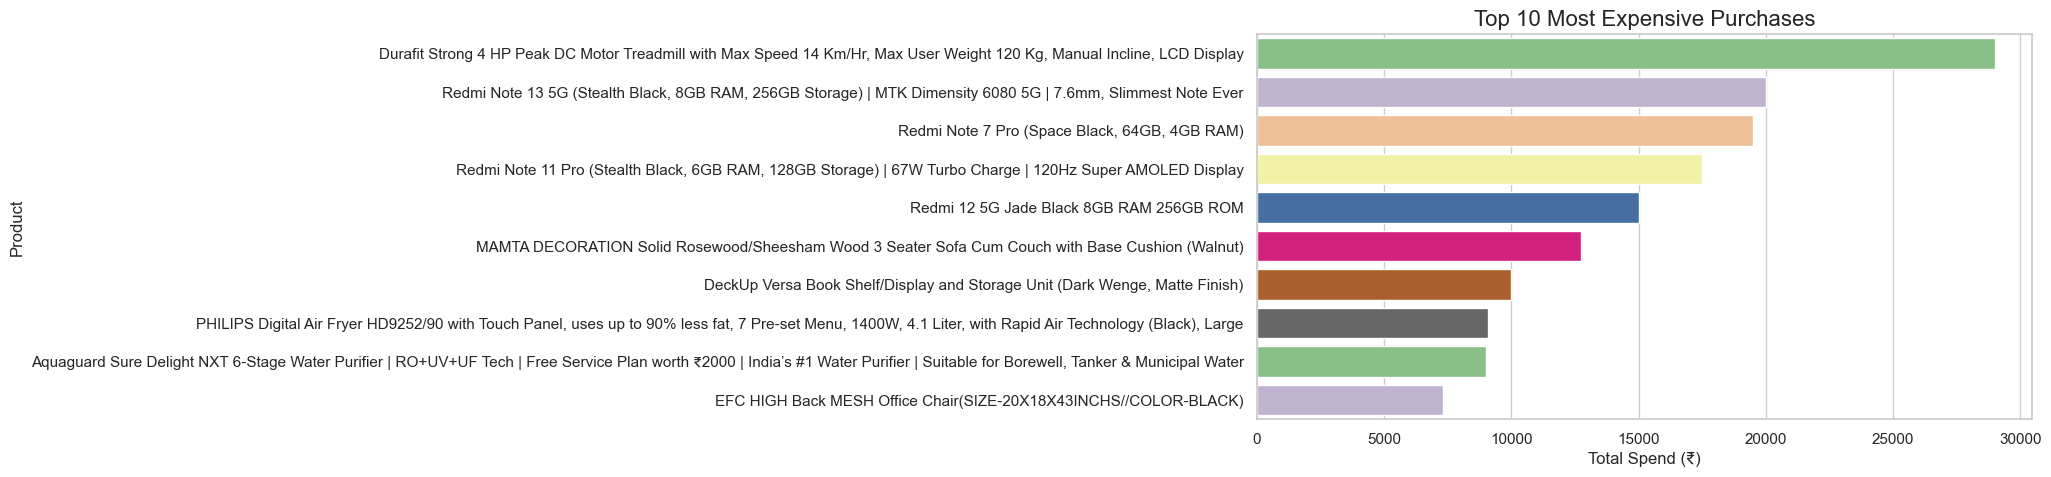

In [32]:
#10 Most expensive purchases

#sorting by price
top_expensive = df.sort_values(by='Total Price', ascending=False).head(10)

#plotting
plt.figure(figsize=(10,5))
sns.barplot(y=top_expensive['Product'], x=top_expensive['Total Price'], hue=top_expensive['Product'], palette='Accent')
plt.title('Top 10 Most Expensive Purchases', fontsize=16)
plt.xlabel('Total Spend (₹)')
plt.ylabel('Product')
plt.tight_layout()
plt.show()

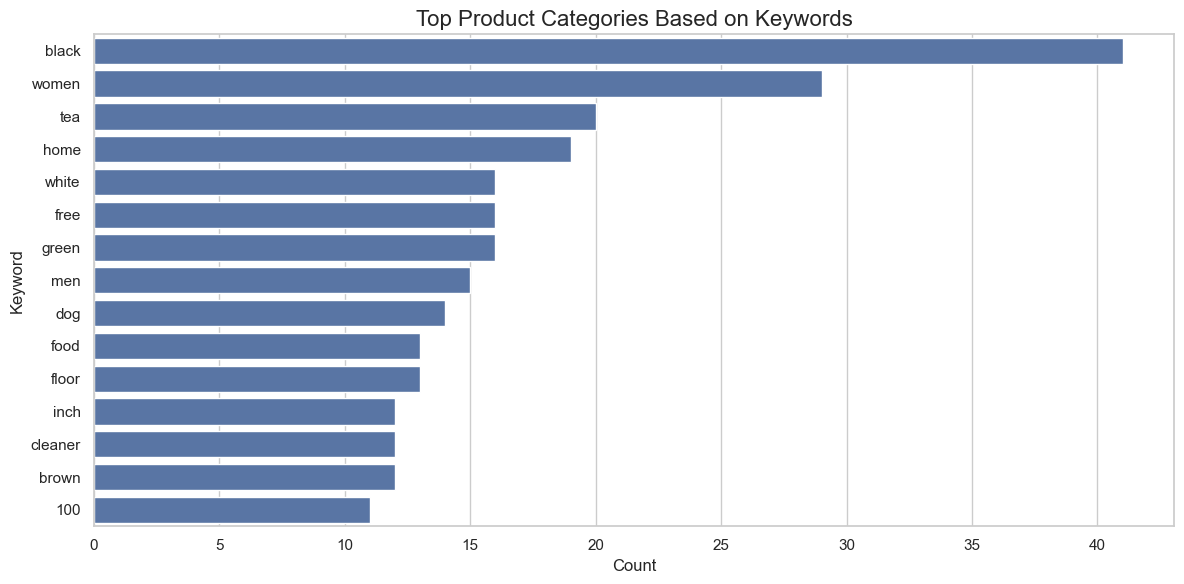

In [34]:
from collections import Counter
import re

# Function to extract keywords from product names
def extract_keywords(product_list):
    # Basic tokenization and cleaning
    keywords = []
    for product in product_list:
        tokens = re.findall(r'\b\w+\b', product.lower())
        # Remove common stopwords and irrelevant terms
        stopwords = {'for', 'with', 'the', 'and', 'by', 'of', 'pack', 'set', 'in', 'on', 'to', 'from'}
        filtered_tokens = [word for word in tokens if word not in stopwords and len(word) > 2]
        keywords.extend(filtered_tokens)
    return keywords

# Extract keywords
product_keywords = extract_keywords(df['Product'])

# Count the most common keywords
keyword_counts = Counter(product_keywords)
top_keywords = keyword_counts.most_common(15)

# Convert to DataFrame for plotting
keywords_df = pd.DataFrame(top_keywords, columns=['Keyword', 'Count'])

# Plotting the top keywords
plt.figure(figsize=(12,6))
sns.barplot(y='Keyword', x='Count', data=keywords_df)
plt.title('Top Product Categories Based on Keywords', fontsize=16)
plt.xlabel('Count')
plt.ylabel('Keyword')
plt.tight_layout()
plt.show()


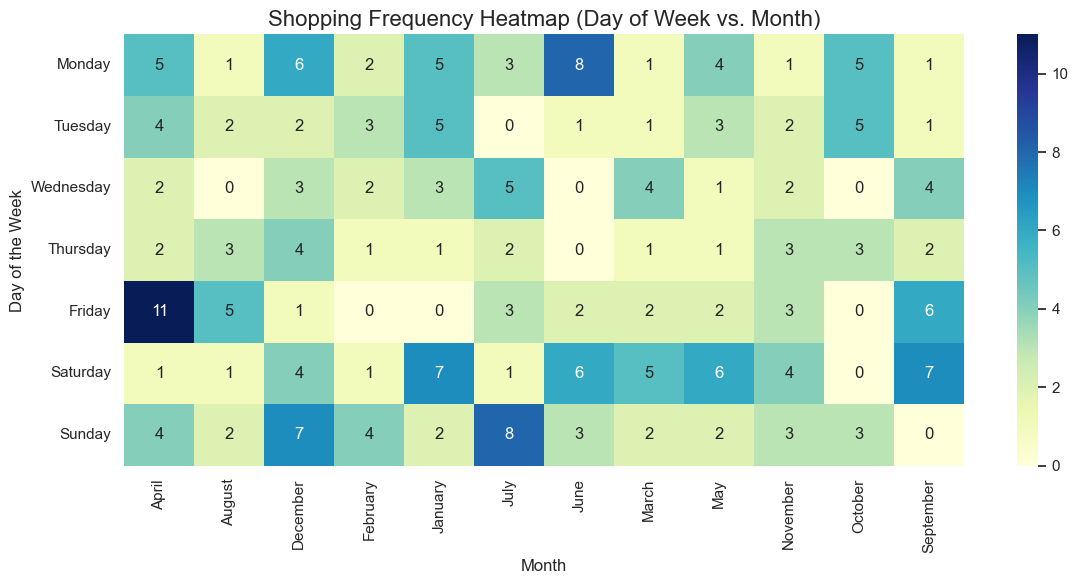

In [36]:
#Heatmap of shopping frequency Day vs. Month
# Prepare data for heatmap: Count of purchases by Day of Week and Month
heatmap_data = df.pivot_table(index='Day of Week', columns='Month', values='Order Number', aggfunc='count')

# Reorder days for better readability
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data = heatmap_data.reindex(day_order)
heatmap_data = heatmap_data.fillna(0)

#plotting
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title('Shopping Frequency Heatmap (Day of Week vs. Month)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Day of the Week')
plt.tight_layout()
plt.show()


In [ ]:
#Repeated products 

filtered_df = df.[df['Product'] != "No Product Found"]

#Count occurences of each product
product_count = filtered_df['Product'].value_counts()

#Filter purchased products

